# Analyzing Manhattan Rolling Sales Data from November 2022 to October 2023 using Python and Seaborn


### Wolfrank Guzman 

## SQL & Jupyter Python Project 

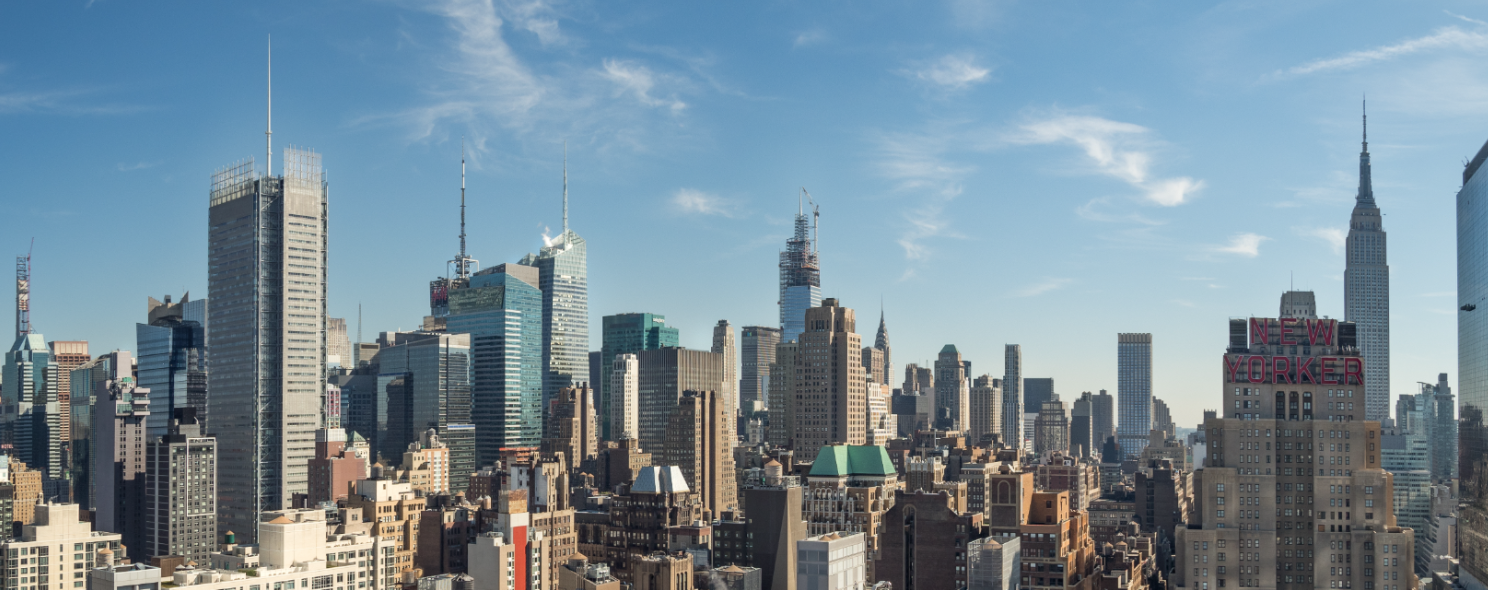

In [16]:
import pandas as pd
import sqlite3
import plotly.express as px
import warnings 
import requests 

# Ignore all warnings
warnings.filterwarnings('ignore')

# Step 1: Read the CSV File
# = r'C:\Users\Wolfrank\Desktop\Data-SQL\ManhattanRE\Data\ManhattanData.csv'

url1 = "https://raw.githubusercontent.com/guzmanwolfrank/Data-SQL/main/ManhattanRE/Data/Merged.csv"  # Replace with the actual URL
df = pd.read_csv(url1)


#df = pd.read_csv(url1).round(2)

# Print or Display DataFrame
display(df)

# SQL QUERIES & PLOTLY EXPRESS VISUALIZATIONS

# Connect to the SQLite database
conn = sqlite3.connect('manhattan_sales.db')

# Create the SQL table
df.to_sql('sales_data', conn, if_exists='replace', index=False)


,Unnamed: 0,RECORD INDEX,NEIGHBORHOOD,BLDGCAT,BLDGDESCRIPTION,TAXCLP,BLOCK,LOT,BLDGCP,ADDRESS,...,UNITS,LANDSFT,GROSSSF,BUILT,TAXCLSALE,BLDGCTOS,SALE_PRICE,SALE_DATE,LAT,LONG
0,0,1.0,ALPHABET CITY,2.0,TWO FAMILY DWELLINGS,1,372.0,36.0,S2,19 AVENUE D,...,3.0,826,"2,481",1900.0,1.0,S2,$1.00,1/20/2023,40.725853,-73.980805
1,1,2.0,ALPHABET CITY,7.0,RENTALS - WALKUP APARTMENTS,2,390.0,50.0,C1,"209 EAST 7TH STREET, 3E",...,29.0,"3,900","18,099",1900.0,2.0,C1,"$154,196.00",9/15/2023,40.725853,-73.980805
2,2,3.0,ALPHABET CITY,7.0,RENTALS - WALKUP APARTMENTS,2,390.0,50.0,C1,"209 EAST 7TH STREET, 4E",...,29.0,"3,900","18,099",1900.0,2.0,C1,"$154,196.00",9/15/2023,40.725853,-73.980805
3,3,4.0,ALPHABET CITY,7.0,RENTALS - WALKUP APARTMENTS,2A,390.0,60.0,C2,191 EAST 7TH STREET,...,5.0,"1,080","3,328",1910.0,2.0,C2,"$2,725,000.00",8/10/2023,40.725853,-73.980805
4,4,5.0,ALPHABET CITY,7.0,RENTALS - WALKUP APARTMENTS,2B,396.0,4.0,C4,221 AVENUE B,...,9.0,"1,936","5,538",1904.0,2.0,C4,$10.00,3/31/2023,40.725853,-73.980805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,16936,16936.0,WASHINGTON HEIGHTS UPPER,22.0,STORE BUILDINGS,4,2174.0,57.0,K2,124 DYCKMAN STREET,...,1.0,"1,600","1,920",1922.0,4.0,K2,$0.00,10/4/2023,40.851471,-73.933321
1330,16937,16937.0,WASHINGTON HEIGHTS UPPER,22.0,STORE BUILDINGS,4,2174.0,65.0,K2,110 DYCKMAN STREET,...,2.0,"1,600","1,920",1940.0,4.0,K2,"$1,900,000.00",12/19/2022,40.851471,-73.933321
1331,16938,16938.0,WASHINGTON HEIGHTS UPPER,22.0,STORE BUILDINGS,4,2175.0,63.0,K1,180 DYCKMAN STREET,...,5.0,"5,000","5,000",1927.0,4.0,K1,$0.00,10/31/2023,40.851471,-73.933321
1332,16939,16939.0,WASHINGTON HEIGHTS UPPER,22.0,STORE BUILDINGS,4,2175.0,66.0,K1,172 DYCKMAN STREET,...,6.0,"10,000","9,500",1927.0,4.0,K1,$0.00,6/20/2023,40.851471,-73.933321


1334

In [17]:


# SQL Queries 

# Query 1: Number of properties sold per neighborhood
query1 = """
SELECT NEIGHBORHOOD, COUNT(*) AS num_sales
FROM sales_data
GROUP BY NEIGHBORHOOD
ORDER BY num_sales DESC
"""
df_sales_by_neighborhood = pd.read_sql_query(query1, conn)

# Visualization 1: Bar chart for Number of properties sold per neighborhood
fig1 = px.bar(df_sales_by_neighborhood, x='NEIGHBORHOOD', y='num_sales',
              title='Number of Properties Sold per Neighborhood',
              labels={'num_sales': 'Number of Sales', 'NEIGHBORHOOD': 'Neighborhood'})

# Show the plot
fig1.show()


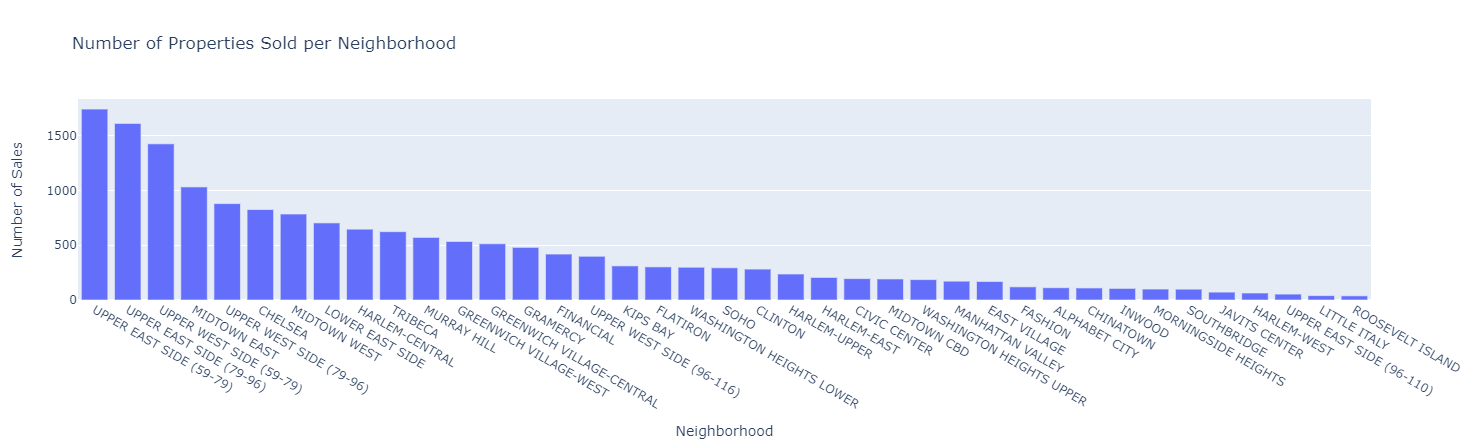

In [18]:

# Query 2
query2 = """
SELECT BLDGCAT, SALE_PRICE
FROM sales_data
WHERE SALE_PRICE IS NOT NULL;
"""

df2 = pd.read_sql_query(query2, conn)

# Visualization 2: Violin plot for Distribution of Sale Prices by Building Category
fig2 = px.violin(df2, x="BLDGCAT", y="SALE_PRICE", title="Distribution of Sale Prices by Building Category")

# Show the plot
fig2.show()


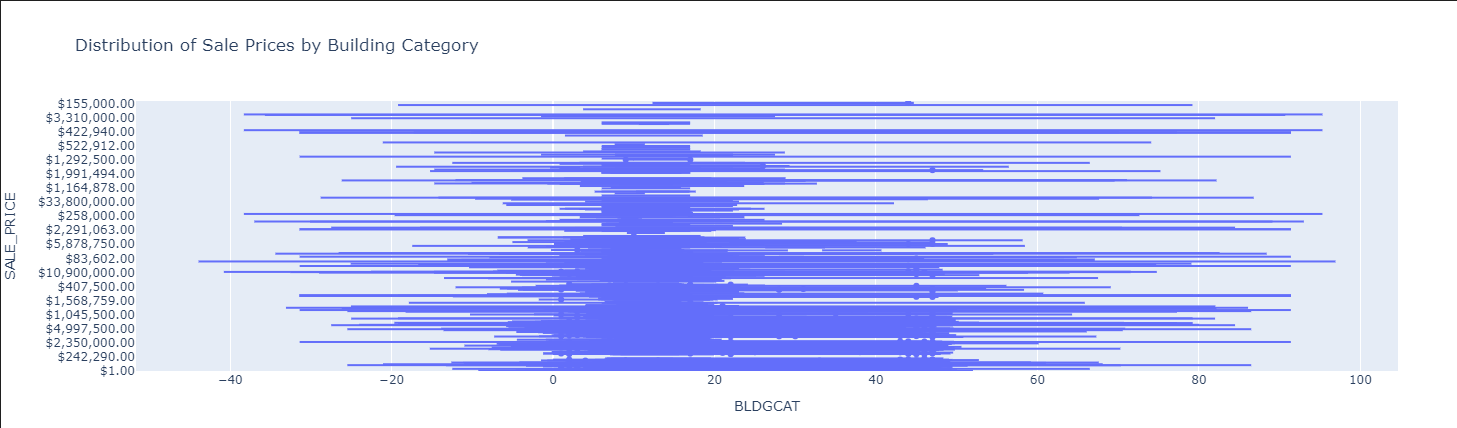

In [19]:
query3 = """
SELECT SALE_DATE, SALE_PRICE
FROM sales_data
WHERE SALE_PRICE IS NOT NULL;
"""

df6 = pd.read_sql_query(query3, conn)

# Visualization 6: Scatter plot for sale price distribution over time
fig6 = px.scatter(df6, x='SALE_DATE', y='SALE_PRICE', title='Sale Price Distribution Over Time')
fig6.show()

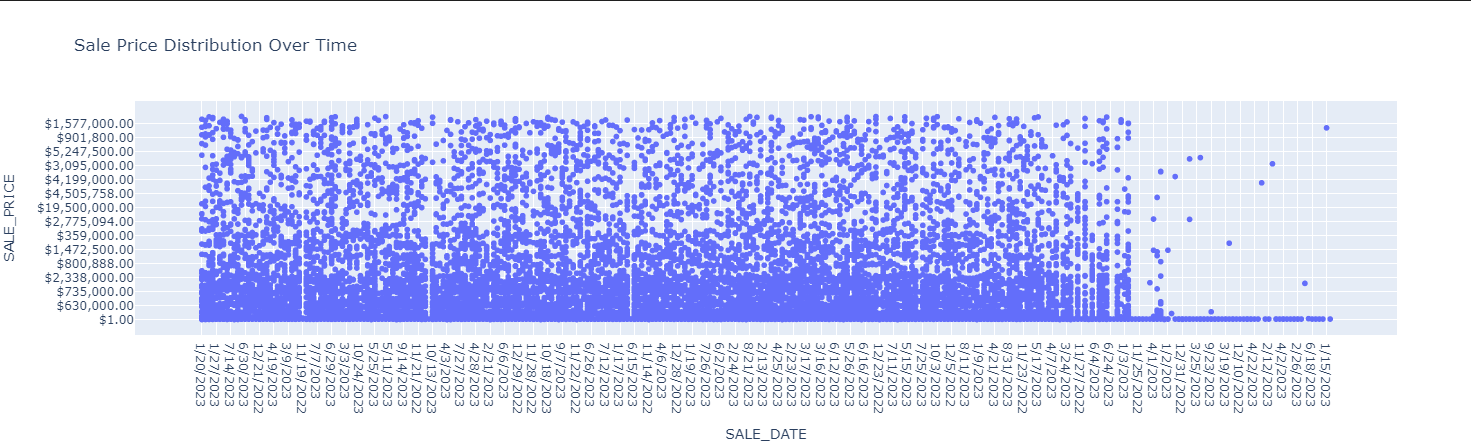

In [20]:

# Query 4: Sale price distribution by neighborhood
query4 = """
SELECT NEIGHBORHOOD, SALE_PRICE
FROM sales_data
WHERE SALE_PRICE IS NOT NULL;
"""
df4 = pd.read_sql_query(query4, conn)

# Visualization 4: Box plot for Sale Price Distribution by Neighborhood
fig4 = px.box(df4, x="NEIGHBORHOOD", y="SALE_PRICE", title="Sale Price Distribution by Neighborhood")

# Show the plot
fig4.show()

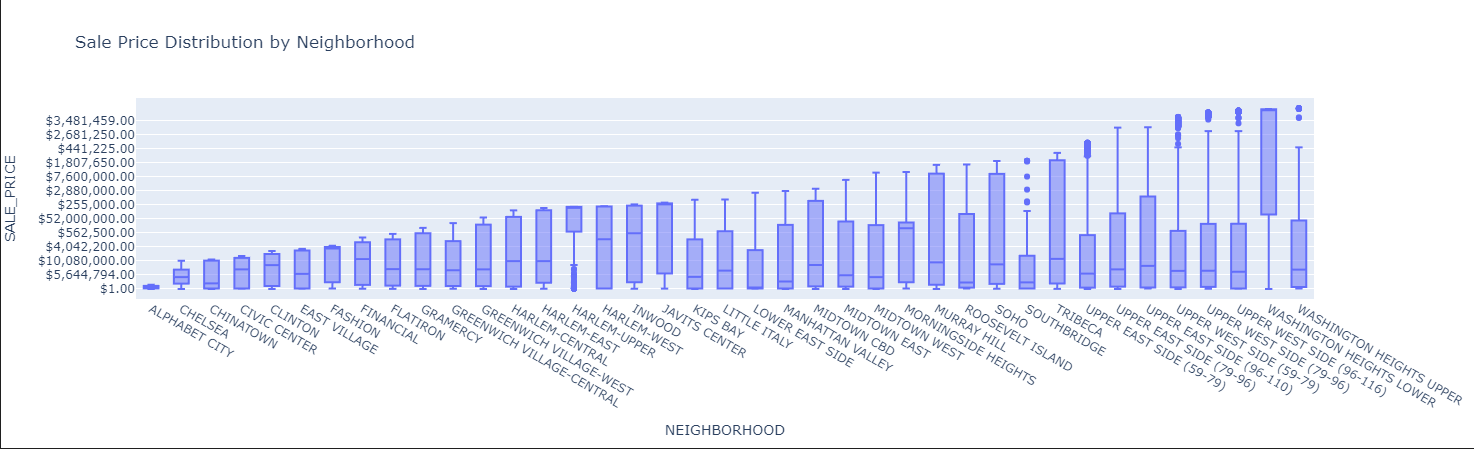

In [21]:
# Query 5: Number of properties sold by tax class
query5 = """
SELECT TAXCLP, COUNT(*) AS num_sales
FROM sales_data
GROUP BY TAXCLP;
"""
df5 = pd.read_sql_query(query5, conn)

# Visualization 5: Pie chart for Number of Properties Sold by Tax Class
fig5 = px.pie(df5, names='TAXCLP', values='num_sales', title='Number of Properties Sold by Tax Class')

# Show the plot
fig5.show()

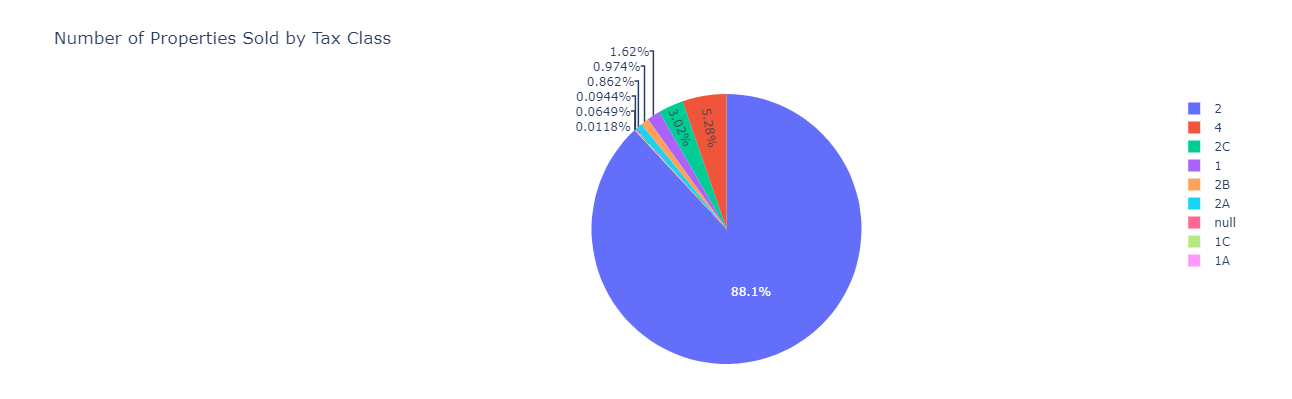

In [22]:

# Connect to the SQLite database
conn = sqlite3.connect('manhattan_sales.db')

# Create the SQL table
df.to_sql('sales_data', conn, if_exists='replace', index=False)

# Query 6: Average GROSSSF by NEIGHBORHOOD
query6 = """
SELECT NEIGHBORHOOD, AVG(GROSSSF) AS avg_gross_sf
FROM sales_data
GROUP BY NEIGHBORHOOD;
"""
df6 = pd.read_sql_query(query6, conn)

# Display the average GROSSSF DataFrame
print("Average GROSSSF by NEIGHBORHOOD:")
display(df6)

# Visualization 5: Heatmap for Average GROSSSF by NEIGHBORHOOD
fig6 = px.imshow(df6.pivot_table(index="NEIGHBORHOOD", values="avg_gross_sf"),
                  labels=dict(index="Neighborhood", value="Average GROSSSF"),
                  title="Average GROSSSF by Neighborhood")

# Show the plot
fig6.show()

# Close the database connection
conn.close()


Average GROSSSF by NEIGHBORHOOD:


,NEIGHBORHOOD,avg_gross_sf
0,ALPHABET CITY,7.176471
1,CHELSEA,36.983051
2,CHINATOWN,8.285714
3,CIVIC CENTER,82.500000
4,CLINTON,31.666667
5,EAST VILLAGE,8.870370
6,FASHION,116.900000
7,FINANCIAL,232.571429
8,FLATIRON,87.000000
9,GRAMERCY,42.789474


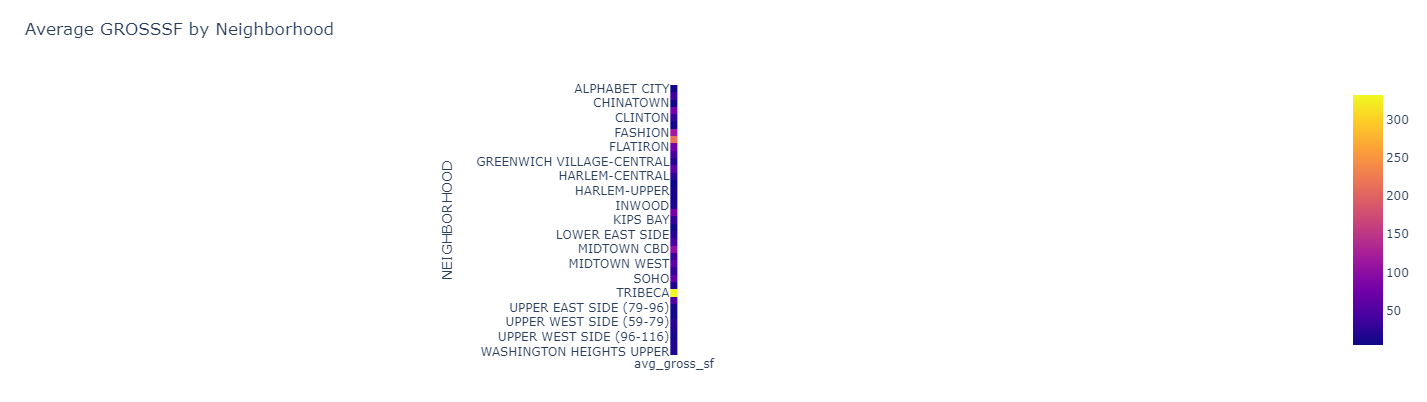